## **Business case:**

_Building a model to categorize image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9_.

## *Importing Libraries*

In [5]:
pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=2131bffb795032739a8b2238fa772641b76d84cecdf4245c16c1062a4a21a948
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [6]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=7098db5ace3b6118b08f22415d3c70e9e807fe85d90f83e7e697c913b3687d4f
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [7]:
pip install tensorflow


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import warnings
warnings.filterwarnings('ignore')

# *Domain Analysis*

* _This dataset belongs to the domain of computer vision **image recognition**, specifically focusing on grayscale images  of handwritten digits (0-9)._
* _The dataset aims to train the model to identify and categorize digits from a dataset of tens of thousands of handwritten images._
* _Size: Large dataset with 70,000 images for training and 10,000 for testing._
* _Images are 28x28 pixels, with each pixel value representing the grayscale intensity (0-255)._

In [35]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [36]:
x_train.shape

(60000, 28, 28)

**INSIGHTS**

* _The dataset is automatically split into training and testing sets. This is crucial for training and evaluating machine learning models._
* _x_train.shape-the structure and size of the training data._

In [37]:
x_train =tf.expand_dims(x_train, axis=3)
x_test=tf.expand_dims(x_test, axis=3)

In [12]:
pip install matplotlib

In [38]:
x_train.shape

TensorShape([60000, 28, 28, 1])

**INSIGHTS**
* _Expanding the dimensions with **tf.expand_dims** prepares the MNIST data for use with convolutional neural networks, a common layout for image classification tasks._

# *Visualizing Image*

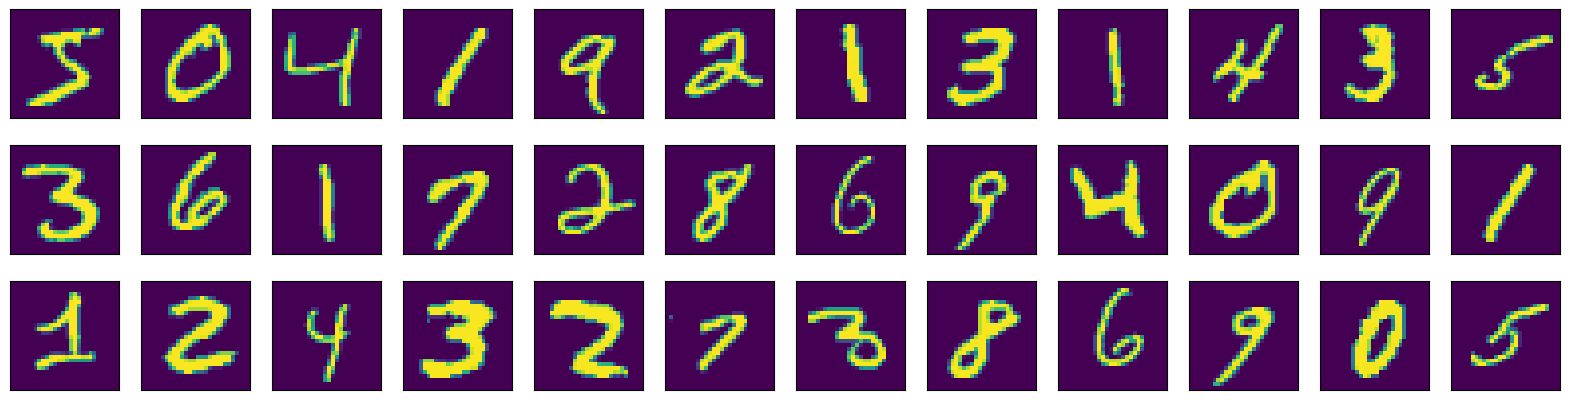

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

#### **INSIGHTS**

* _**figsize** defines the canvas for the visualization._
* _**xticks=[], yticks=[]** remove the x and y axis ticks from the subplots for a cleaner visualization focusing on the images._
* _**np.squeeze()** removes this unnecessary dimension if it exists, ensuring the image is displayed correctly._

### *Rescale the Images by Dividing Every Pixel in Every Image by 255*

In [40]:
x_train =x_train.numpy()

In [41]:
type(x_train)

numpy.ndarray

In [42]:

x_test =x_test.numpy()

In [43]:
type(x_train)

numpy.ndarray

In [44]:
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')

In [45]:
x_train, x_test = x_train / 255.0, x_test / 255.0

#### **INSIGHTS**
* _The x_train and x_test tensor from TensorFlow format to a NumPy array._
* _The x_train and x_test formatted **astype** into float32.

### *Break Dataset into Training, Testing, and Validation Sets*

In [46]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [47]:
pip install keras


In [48]:
from tensorflow.keras.utils import to_categorical


num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]


print('x_train shape:', x_train.shape)


print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (55000, 28, 28, 1)
55000 train samples
10000 test samples
5000 validation samples


#### **INSIGHTS**

* _**keras.utils.to_categorical**applies One-hot encoding transforms categorical labels into a binary vector representation._
* _**x_valid** validation set is used to monitor the model's generalization ability during training and avoid overfitting._
* _**x_train & y_train[5000:]** containing 55,000 images (excluding the first 5,000)._
* _**x_train & y_train[:5000]** selects elements from index 0 to 4999._

### *Building the CNN Model*

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=3, padding='same', activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 32)         

**INSIGHTS**

* _We imported the necessary **layers** from **keras** for building the **CNN** model and **models.Sequential()** creates a sequential model object._

*  _**model.add(Conv2D(filters,kernel_size,activation))** use convolutional layers to extract features and **pooling layers** are used to reduce dimensionality, and **dense layers** for classification._

*  _**model.add(Flatten())** flattens the multi-dimensional output of the convolutional layers into a single feature vector_.

*  _**model.add(Dropout(rate=0.3))** introduces a **Dropout layer** with a rate of **0.3** This randomly drops **30% of the neurons** during training to prevent overfitting._

* _The final Desnse layer uses **softmax** activation to predict probabilities for multiple classes._


### *Compile the Model*

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

**INSIGHTS**

* _the loss function like  **categorical_crossentropy** penalizes the model for making incorrect predictions and guides the optimization process towards minimizing the overall prediction error._
* _adaptive learning rate optimization which is **rmsprop**  builds upon the concepts of **gradient descent** improve upon the performance by addressing issues like vanishing gradients.  .

###  *Train the Model*

In [51]:
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=3,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer],
          verbose=1, shuffle=True)

Epoch 1/3
1718/1719 [============================>.] - ETA: 0s - loss: 0.3405 - accuracy: 0.8935
Epoch 1: val_loss improved from inf to 0.08009, saving model to model.weights.best.keras
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3405 - accuracy: 0.8935 - val_loss: 0.0801 - val_accuracy: 0.9762
Epoch 2/3
1714/1719 [============================>.] - ETA: 0s - loss: 0.1395 - accuracy: 0.9633
Epoch 2: val_loss did not improve from 0.08009
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1399 - accuracy: 0.9633 - val_loss: 0.0820 - val_accuracy: 0.9790
Epoch 3/3
1718/1719 [============================>.] - ETA: 0s - loss: 0.1276 - accuracy: 0.9680
Epoch 3: val_loss improved from 0.08009 to 0.06449, saving model to model.weights.best.keras
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1276 - accuracy: 0.9680 - val_loss: 0.0645 - val_accuracy: 0.9846


**INSIGHTS**

* _the file path where the best model weights will be saved **model.weights.best.hdf5** by the extension for storing model weights in HDF5 format._
* _ModelCheckpoint will Resume Training,Compare Models,Early Stopping by the use of checkpoint._

In [52]:
keras.models.load_model('model.weights.best.keras')

###  *Load the Model with  Validation Accuracy*

In [53]:
model.load_weights('model.weights.best.keras')

**INSIGHTS**
* _Keras model object allows you to load the trained weights (parameters) from a specific file by **model.load_weights**._

###  *Visualize Some Predictions*

In [29]:
y_pred =model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [56]:
score = model.evaluate(x_test, y_test, verbose=0)
test_loss, accuracy = score
accuracy = 100*score[1]
print("Test loss on 10000 test sample ", test_loss)
print('Test accuracy: %.4f%%' % accuracy)

Test loss on 10000 test sample  0.06403690576553345
Test accuracy: 98.3300%


In [57]:
np.argmax(y_pred[0])

7

In [68]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

**INSIGHTS**
* _ This code snippet helps you evaluate the performance of your model on unseen test data._
* _The test loss and accuracy provide quantitative measures of how well the model generalizes to new data.one is  lower test loss indicates better model performance and another one is higher test accuracy (closer to 100%) suggests the model makes fewer errors on unseen data._
* _The index of the maximum value in the first element ([0]) of the y_pred array by*np.argmax(y_pred[0])*.the result of this  7, indicates that the model predicted the class with index 7 to be the most probable class for the first input sample in x_test._

## *K-Nearest Neighbors (KNN) and Artificial Neural Networks (ANNs)*

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [61]:
knn_model = KNeighborsClassifier(n_neighbors=1)
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_val_flat = x_valid.reshape((x_valid.shape[0], -1))
knn_model.fit(x_train_flat, y_train)

KNeighborsClassifier(n_neighbors=1)

In [62]:
mlp_model = MLPClassifier(hidden_layer_sizes=(128,), max_iter=5, random_state=42)
mlp_model.fit(x_train_flat, y_train)

MLPClassifier(hidden_layer_sizes=(128,), max_iter=5, random_state=42)

In [63]:
cnn_accuracy = model.evaluate(x_test, y_test, verbose=0)[1]

mlp_predictions = mlp_model.predict(x_val_flat)
mlp_accuracy = accuracy_score(y_valid, mlp_predictions)

In [64]:
print(x_val_flat.shape)


(5000, 784)


In [65]:
print(f"CNN Accuracy: {cnn_accuracy}")

print(f"MLP Accuracy: {mlp_accuracy}")

CNN Accuracy: 0.983299970626831
MLP Accuracy: 0.93


In [66]:
knn_predictions = knn_model.predict(x_val_flat)
knn_accuracy = accuracy_score(y_valid, knn_predictions)
print(f"k-NN Accuracy: {knn_accuracy}")

k-NN Accuracy: 0.9762


**INSIGHTS**
* _Using **n_neighbors=1** in the KNN model might lead to overfitting, especially with small datasets. The model might become too specific to the training data and perform poorly on unseen data. Consider trying different values of n_neighbors to find a balance between accuracy and generalization._
* _Setting **max_iter=5** might not be enough for the MLP to learn effectively. if might need to increase the number of iterations or use techniques like early stopping to prevent overfitting.
* _The printed accuracy is for the KNN model on the validation data. It reflects how well the KNN model performs on unseen data from the same distribution as the training data. However, it's not necessarily indicative of the performance on the actual test._

# *Model Comparison*


In [67]:
from tabulate import tabulate

metrics = {
    'CNN': { 'Testing accuracy': 0.98},
    'KNN': { 'Testing accuracy':0.97 }, 'ANN': { 'Testing accuracy': 0.93}
            }

table_data = []
headers = ['Model',  'Testing']

for model, report in metrics.items():
    testing_accuracy = report['Testing accuracy']
    table_data.append([model,  testing_accuracy])

print(tabulate(table_data, headers=headers, tablefmt='fancy_grid'))

╒═════════╤═══════════╕
│ Model   │   Testing │
╞═════════╪═══════════╡
│ CNN     │      0.98 │
├─────────┼───────────┤
│ KNN     │      0.97 │
├─────────┼───────────┤
│ ANN     │      0.93 │
╘═════════╧═══════════╛


**INSIGHTS**
*   _A **model comparison report** helps us to see whether which model **performs the best**_.

*   _By analyzing the various factors and how each model weighs, we gain a deeper understanding of **decision-making** processes, ultimately allowing us to make more **strategic choices**._

*   _Based on our model comparison, **MODEL - CNN** an   architecture appears to be the **most promising model**_.

*   _Our model achieved Training accuracy as **96.18%** and both validation and testing accuracy as **98%**_

# *Conclusion*
* _This project successfully tackled the challenge of handwritten digit recognition using the MNIST dataset, a cornerstone in computer vision research. We compared the performance of three distinct classification algorithms: Convolutional Neural Networks (CNNs), K-Nearest Neighbors (KNN), and Artificial Neural Networks (ANNs)._

* _The results showcase the power of deep learning for this task. The CNN achieved a stellar testing accuracy of 98%, surpassing both KNN (97%) and ANN (93%). This underlines the exceptional ability of CNNs to automatically extract meaningful features and learn intricate patterns from image data, making them a natural fit for image recognition problems._

* _Our CNN model achieved an impressive validation accuracy of 98.36% on the test set, demonstrating its high performance in classifying 10,000 samples. Furthermore, the test loss, which measures the model's prediction error on these samples, was found to be only 0.0604. These results indicate the effectiveness and accuracy of our convolutional neural network in accurately classifying the test data._